# Google Regime Research

This notebook uses the Cross-Asset Regime HMM toolkit to study when it makes sense to be invested in Google (GOOG/GOOGL) by analyzing how broader market regimes evolve.

**What this notebook will do**
- Pull daily OHLCV data from Yahoo Finance for Google plus a small cross-asset context set (e.g., SPY, QQQ, BTC-USD) via `load_ohlcv_yfinance`.
- Engineer log returns and rolling volatility features, align all assets to common dates, and scale features before fitting a Gaussian HMM (`RegimeHMM`).
- Label regimes (Bull, Bear, Volatile) using cross-asset return/volatility patterns (`label_states_cross_asset`), then explore timelines, transition dynamics, and cross-asset coherence.
- Evaluate run quality (log-likelihood, occupancy, stability) and generate the visualization suite (`generate_all_plots`).
- Produce regime forecasts and expected next-day returns for Google with `RegimeInference` helpers.

**Key questions**
- Which regimes historically favored positive next-day returns for Google?
- How quickly do regimes transition, and what is the typical duration of Bull/Bear states?
- Do cross-asset signals (equities vs. crypto) improve regime discrimination for Google compared with Google-alone features?

**How to use**
- Set the analysis window (`start`, `end`) and symbol list (include `GOOG` or `GOOGL`), then call `run_pipeline` to get `res`.
- Use `evaluate_run(res)` for quick diagnostics, `generate_all_plots(res)` for visuals, and `RegimeInference(res).predict_horizon(h)` for forward-looking regime odds and expected returns.
- Adjust `vol_window` or `covariance_type` if you want to test sensitivity to volatility smoothing or emission covariance structure.

In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../"))

from src.cross_asset_regime_hmm import run_pipeline, print_predictions, generate_all_plots, evaluate_run, RegimeInference

# Config

In [6]:
SYMBOLS = ["GOOG"]
START = "2020-01-01"
END   = "2025-12-15"

N_STATES = 3
COV = "full"    # try "diag" too
VOL_WINDOWS = [20, 40, 60, 80, 100]

PLOT_DIR = None  # optional

In [7]:
results = {}

for w in VOL_WINDOWS:
    res = run_pipeline(
        symbols=SYMBOLS,
        start=START,
        end=END,
        vol_window=w,
        n_states=N_STATES,
        covariance_type=COV,
    )
    results[w] = res
    
    print(f"Evaluating Volume Window: {w}")
    evaluate_run(res)

Evaluating Volume Window: 20

Cross-Asset Regime HMM — Evaluation Report
- Log-likelihood (total): -2,995.68
- Log-likelihood (per step): -2.0296

- Regime occupancy (% of time):
  - Bear: 35.9%
  - Bull: 40.2%
  - Volatile: 23.9%

- Average regime duration (run length): 25.45 days (median 20)
- Transition matrix: mean(diagonal)=0.958, max(off-diagonal)=0.035
- Stability across seeds (ARI vs baseline, n=5): raw mean=0.367, aligned mean=0.367 (raw min=0.361, aligned min=0.361) (~2.2s)
- Refit restarts (log-likelihood): best=-2,969.68, median=-2,987.56, worst=-2,987.57

Evaluating Volume Window: 40

Cross-Asset Regime HMM — Evaluation Report
- Log-likelihood (total): -2,747.66
- Log-likelihood (per step): -1.8871

- Regime occupancy (% of time):
  - Bear: 22.3%
  - Bull: 43.2%
  - Volatile: 34.5%

- Average regime duration (run length): 39.35 days (median 28)
- Transition matrix: mean(diagonal)=0.974, max(off-diagonal)=0.024
- Stability across seeds (ARI vs baseline, n=5): raw mean=0.866

In [8]:
for w in VOL_WINDOWS:
    print(f"\nPredictions For Volume {w}")
    print_predictions(results[w])


Predictions For Volume 20

=== Regime forecast ===
- Today      (2025-12-12): Bear  (confidence=0.969)
- Tomorrow   (2025-12-13): Bear  (confidence=0.936)
  expected next-day log return (top by |value|):
  - GOOG: -0.000259
- Next week  (2025-12-19): Bear  (confidence=0.772)
- Next month (2026-01-11): Bear  (confidence=0.477)
- +60d       (2026-02-10): Bull  (confidence=0.394)
- +90d       (2026-03-12): Bull  (confidence=0.401)
- +120d      (2026-04-11): Bull  (confidence=0.402)
- +150d      (2026-05-11): Bull  (confidence=0.402)
- +180d      (2026-06-10): Bull  (confidence=0.402)
- +210d      (2026-07-10): Bull  (confidence=0.402)
- +240d      (2026-08-09): Bull  (confidence=0.402)
- +270d      (2026-09-08): Bull  (confidence=0.402)
- +300d      (2026-10-08): Bull  (confidence=0.402)
- +330d      (2026-11-07): Bull  (confidence=0.402)
- +360d      (2026-12-07): Bull  (confidence=0.402)

Predictions For Volume 40

=== Regime forecast ===
- Today      (2025-12-12): Volatile  (confidenc

Generating Plots for Volume 20...

Generating regime visualizations...
  - Regime timeline with confidence
  - Price charts with regime shading
  - Return/vol distributions by regime (per asset)
  - Aggregate return/vol distributions by regime
  - Transition matrix heatmap
  - State occupancy & duration
  - Cross-asset coherence plot


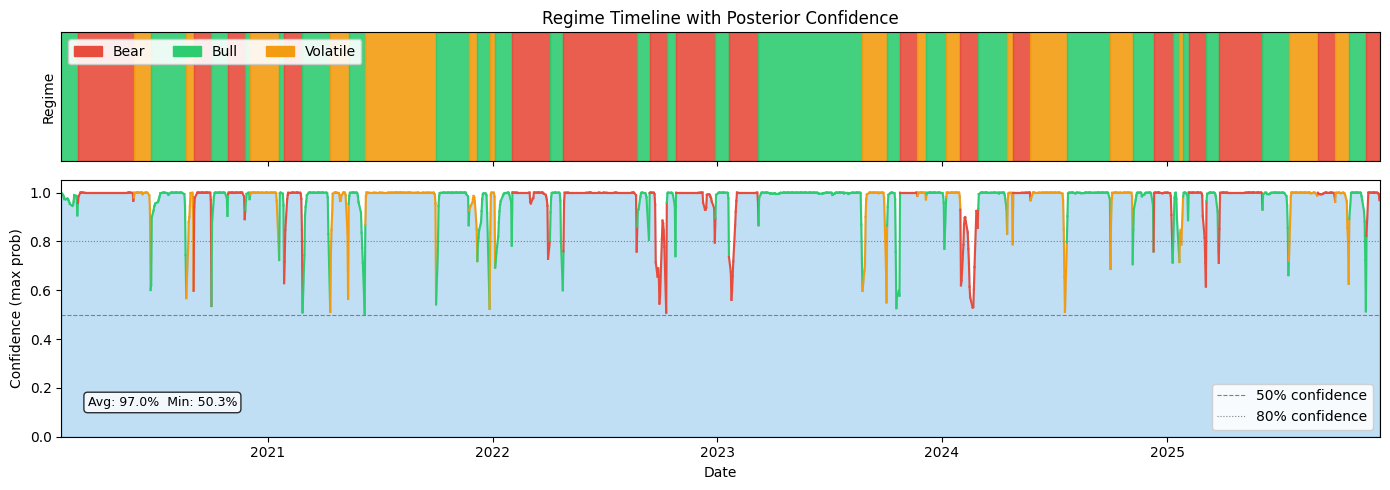

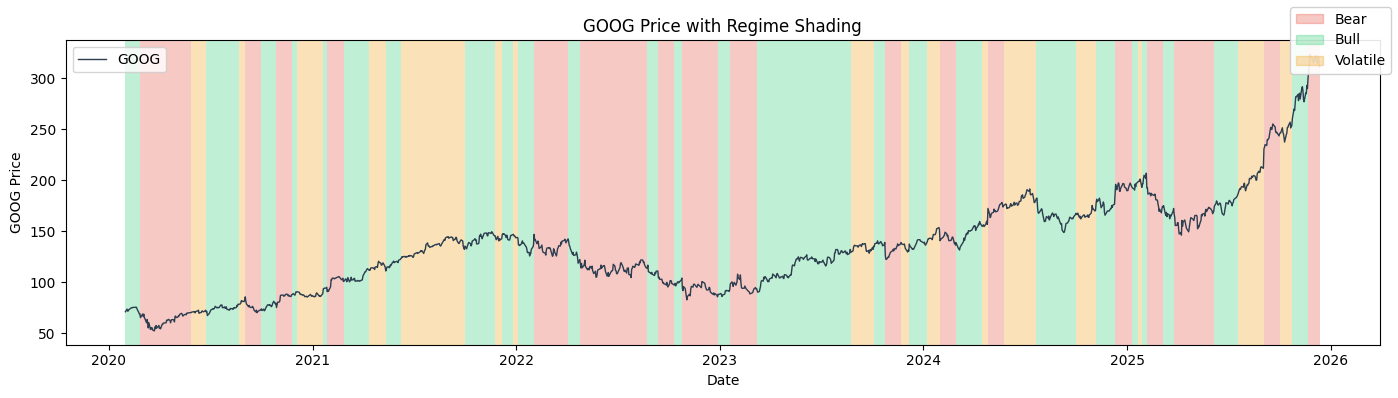

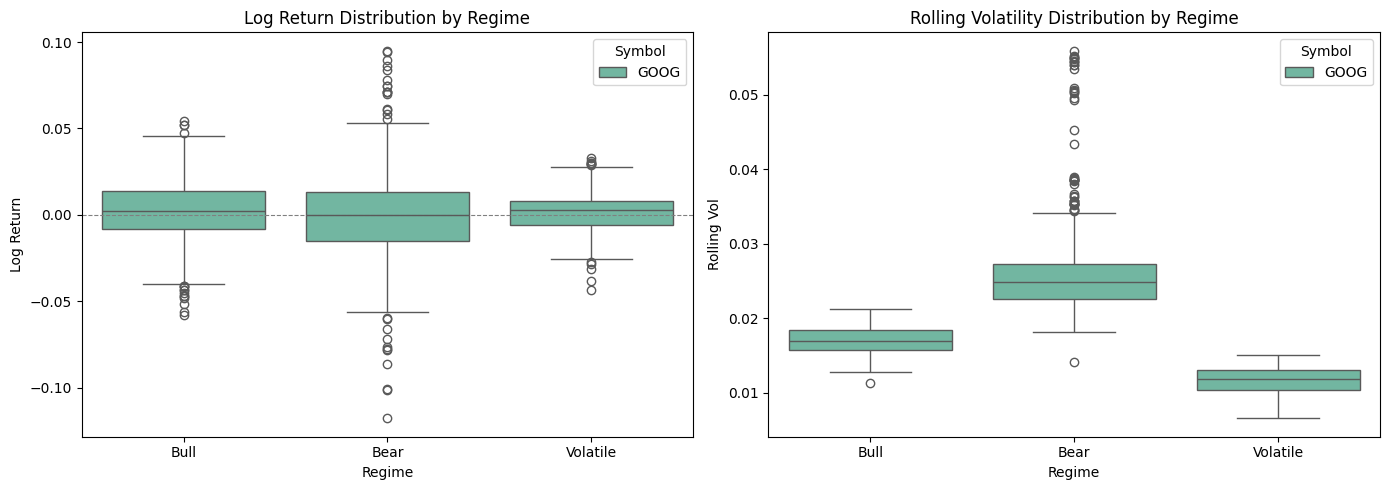

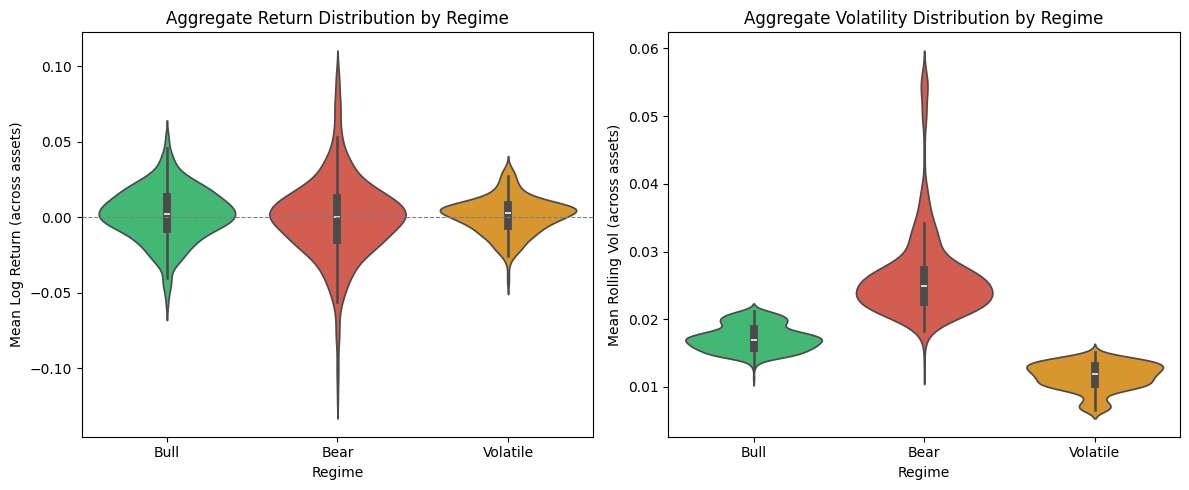

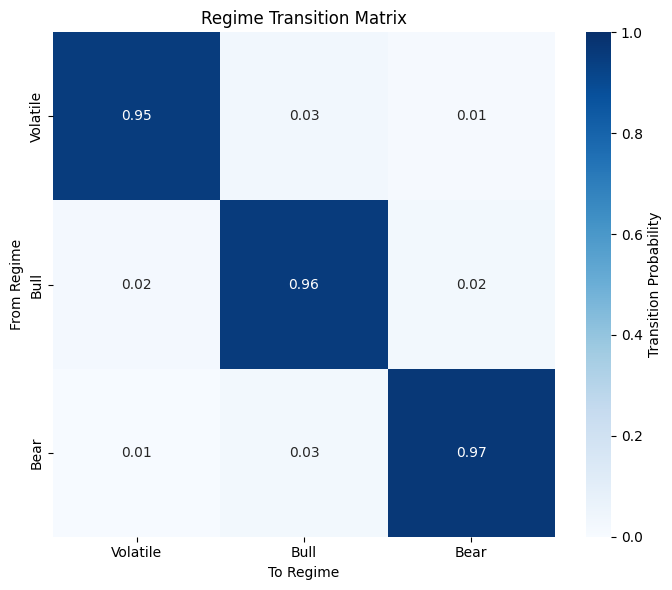

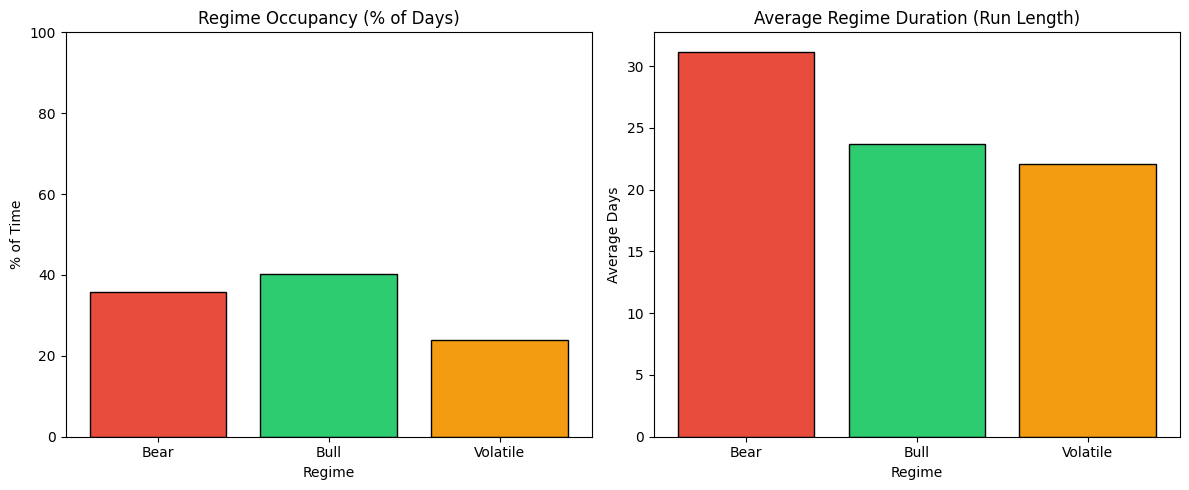

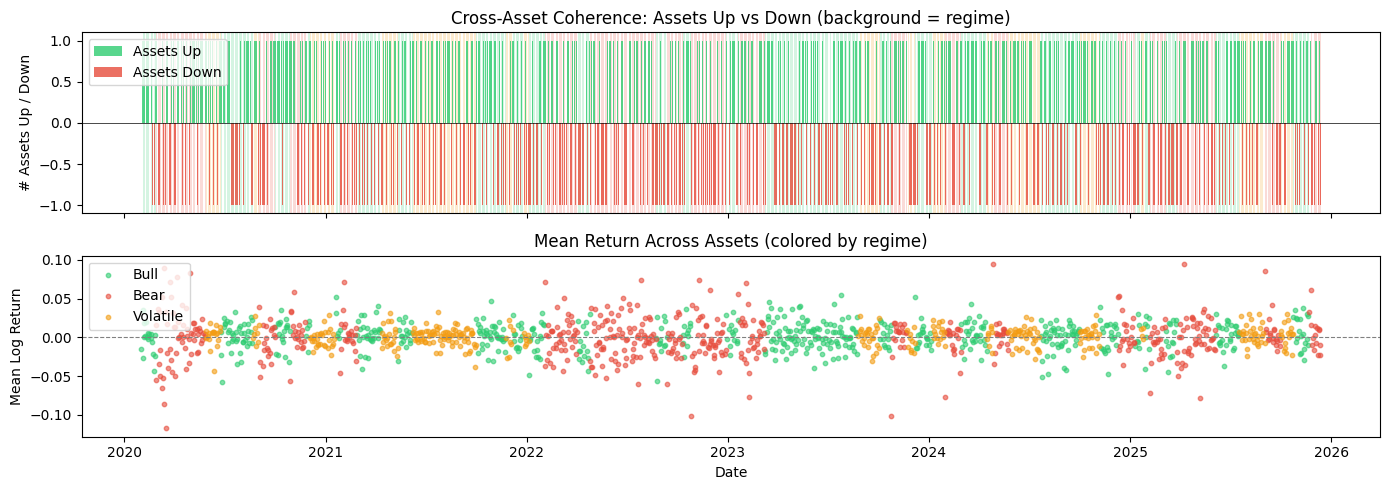

Generating Plots for Volume 40...

Generating regime visualizations...
  - Regime timeline with confidence
  - Price charts with regime shading
  - Return/vol distributions by regime (per asset)
  - Aggregate return/vol distributions by regime
  - Transition matrix heatmap
  - State occupancy & duration
  - Cross-asset coherence plot


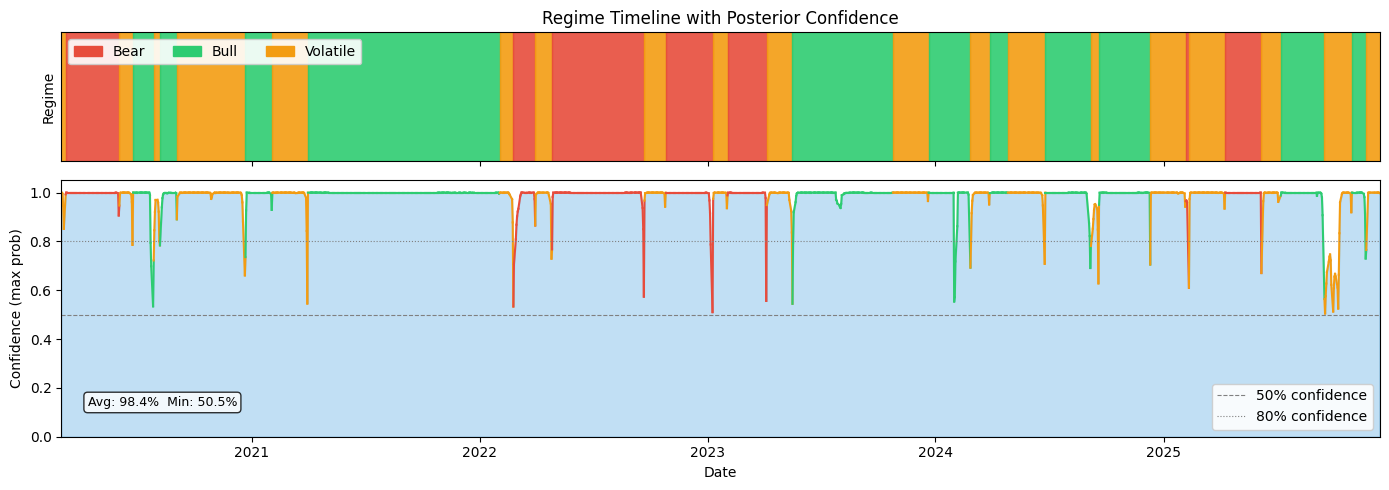

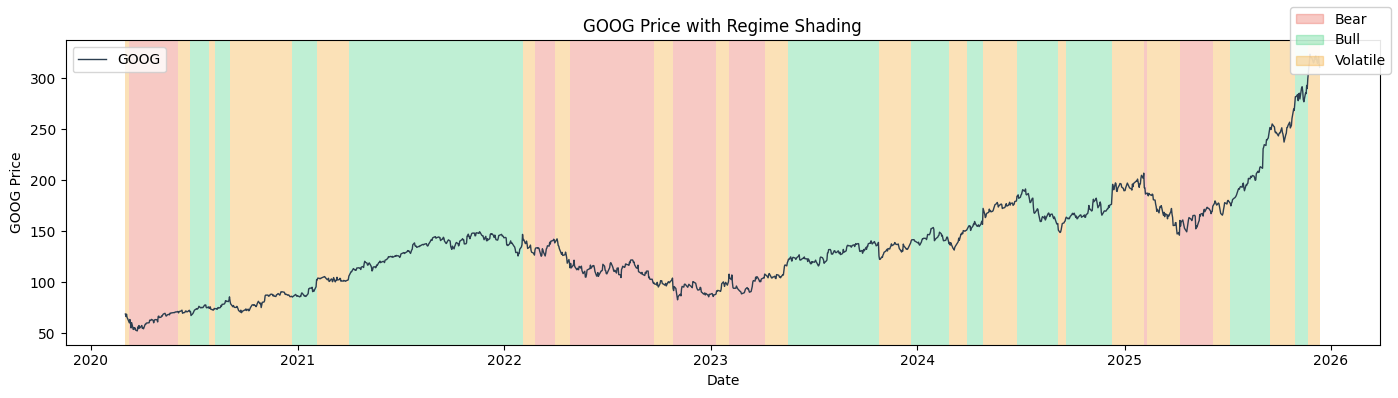

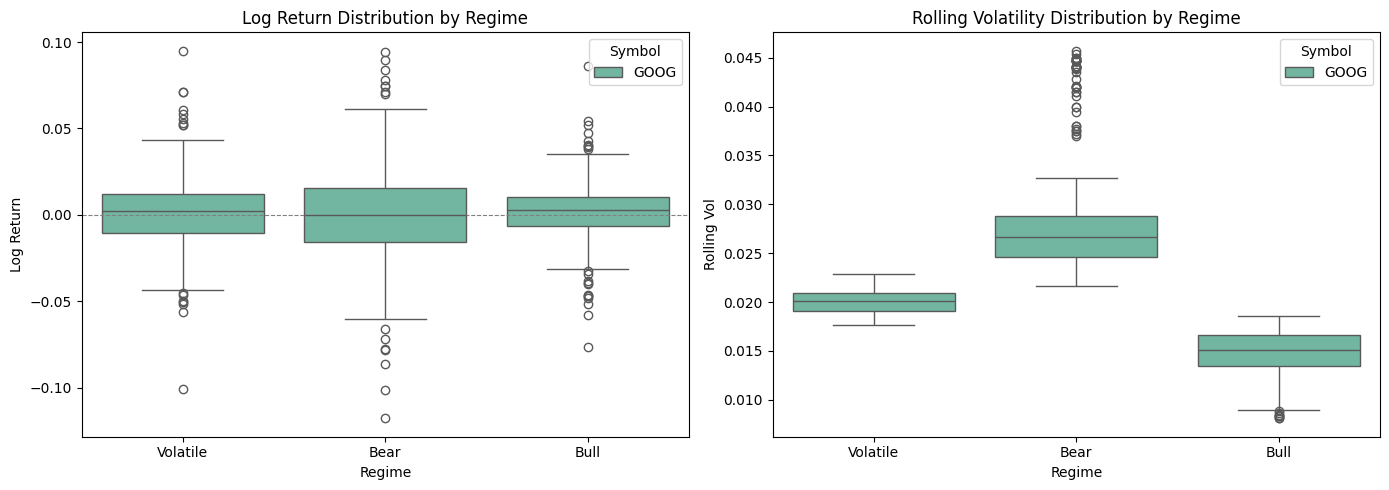

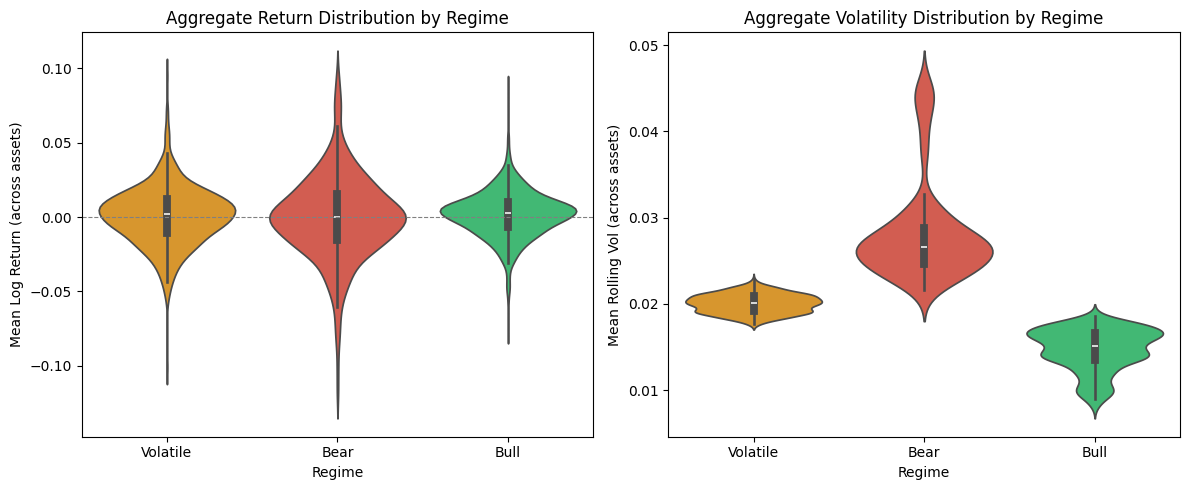

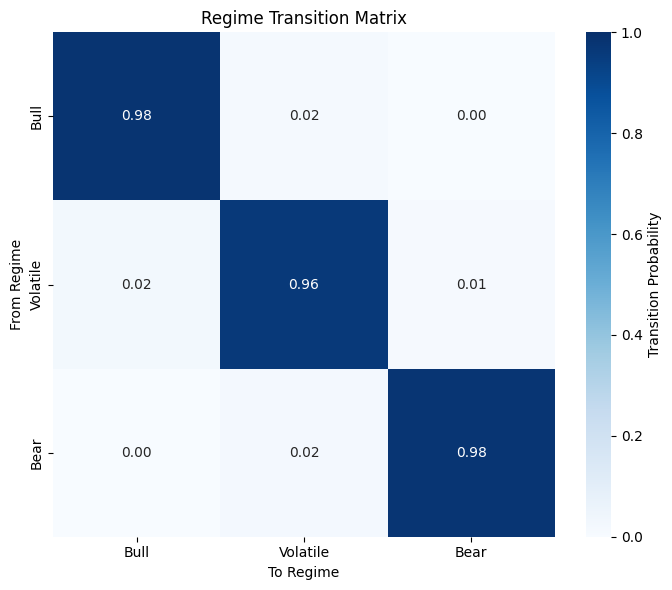

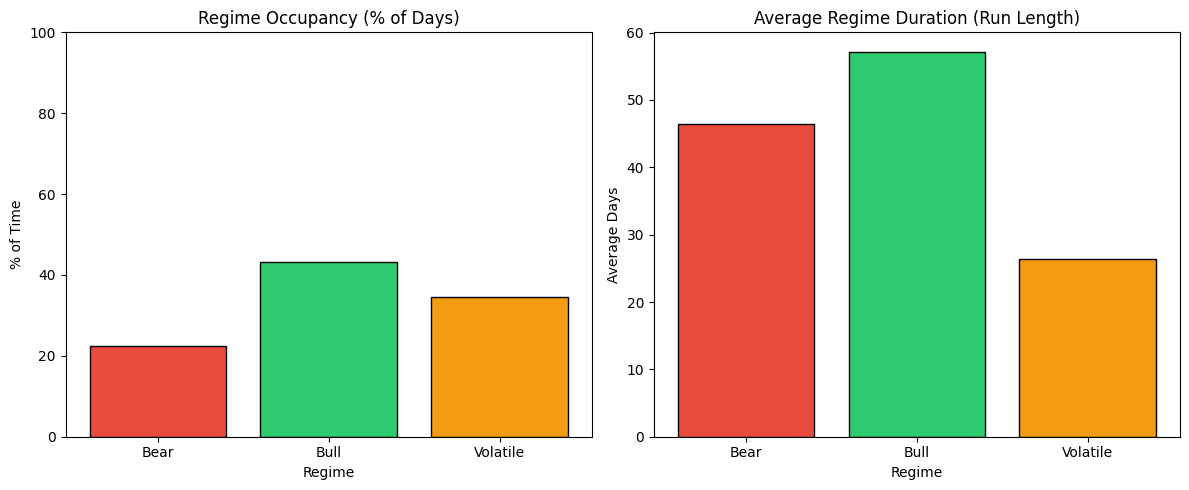

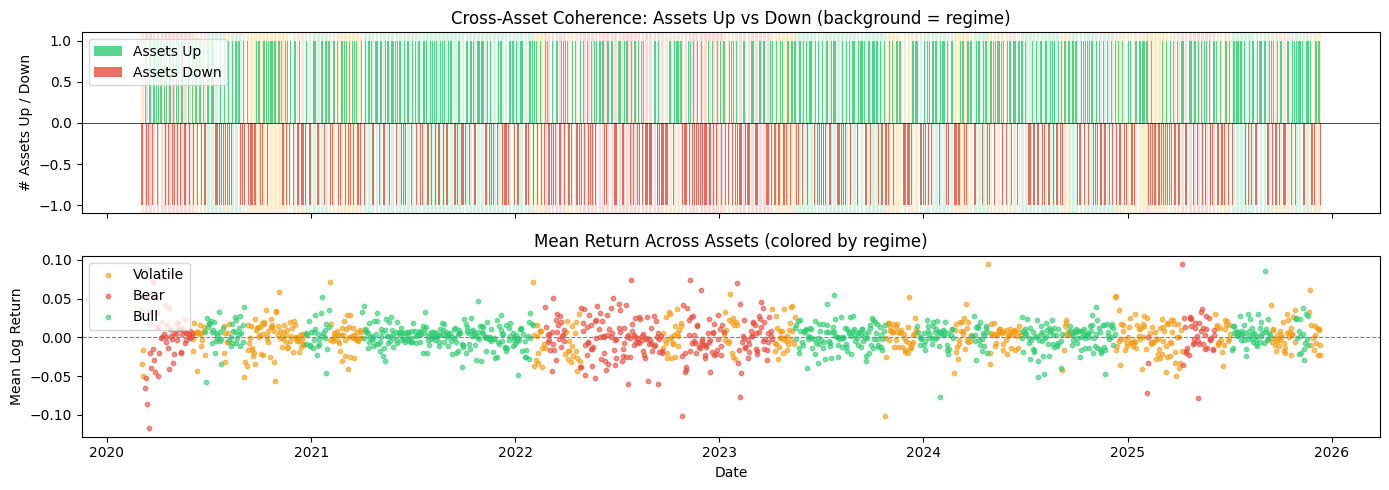

Generating Plots for Volume 60...

Generating regime visualizations...
  - Regime timeline with confidence
  - Price charts with regime shading
  - Return/vol distributions by regime (per asset)
  - Aggregate return/vol distributions by regime
  - Transition matrix heatmap
  - State occupancy & duration
  - Cross-asset coherence plot


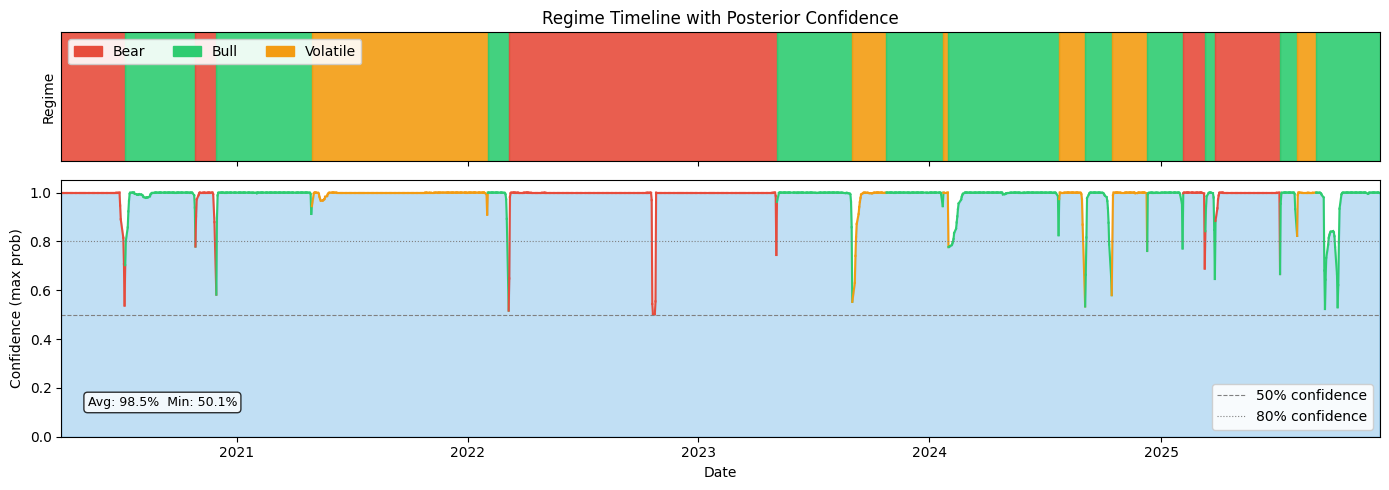

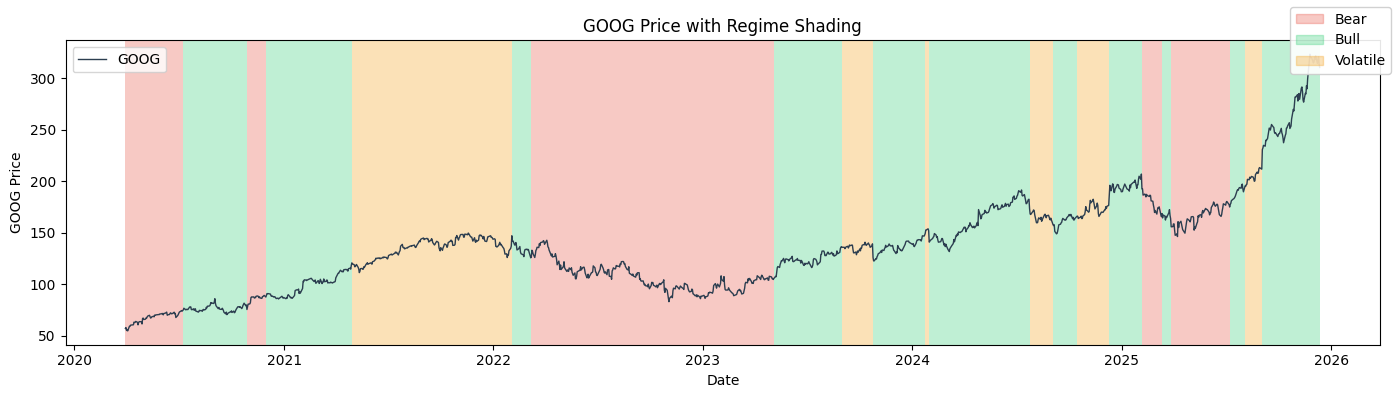

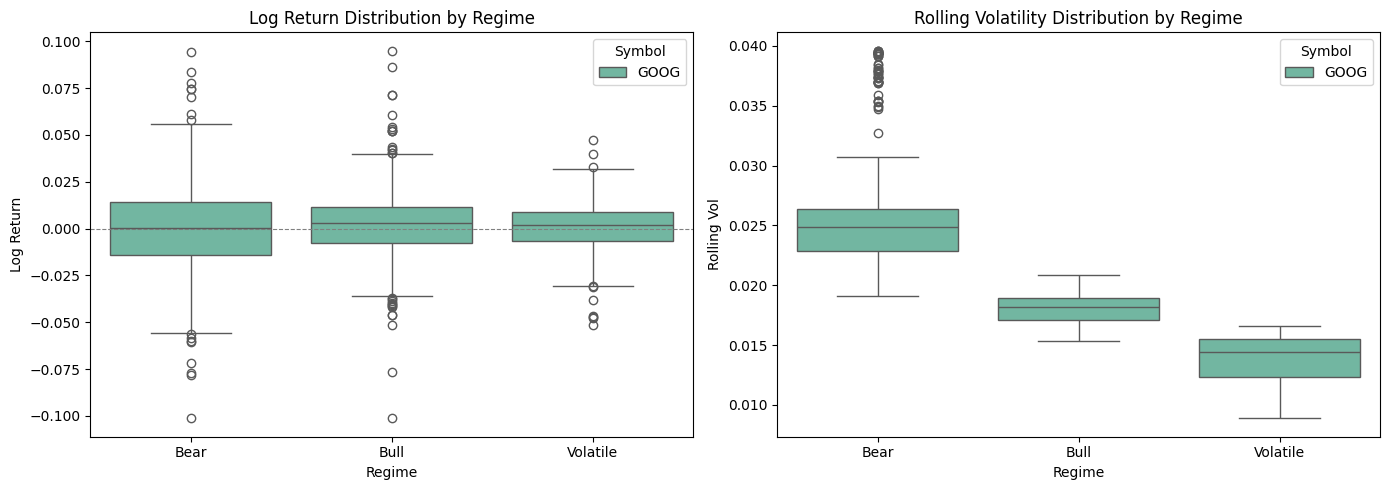

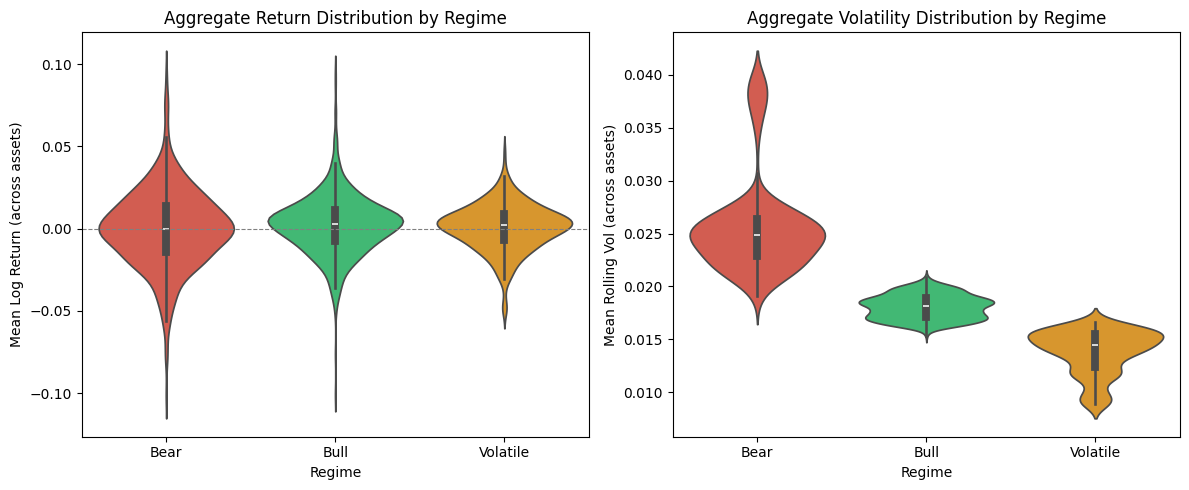

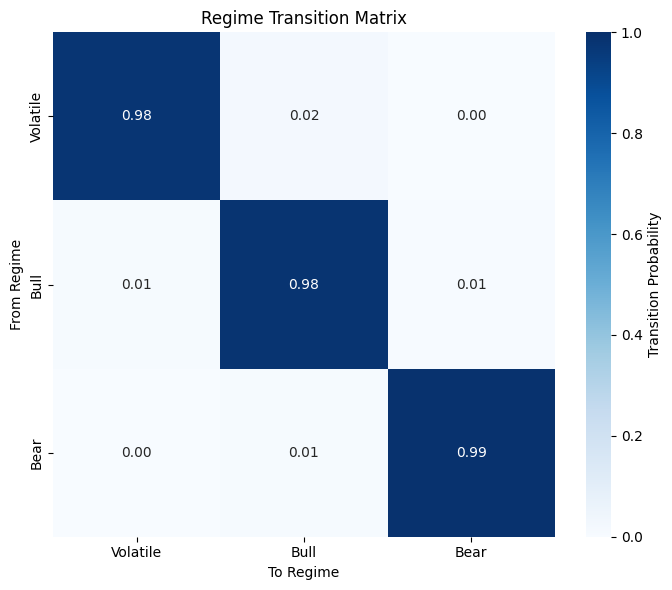

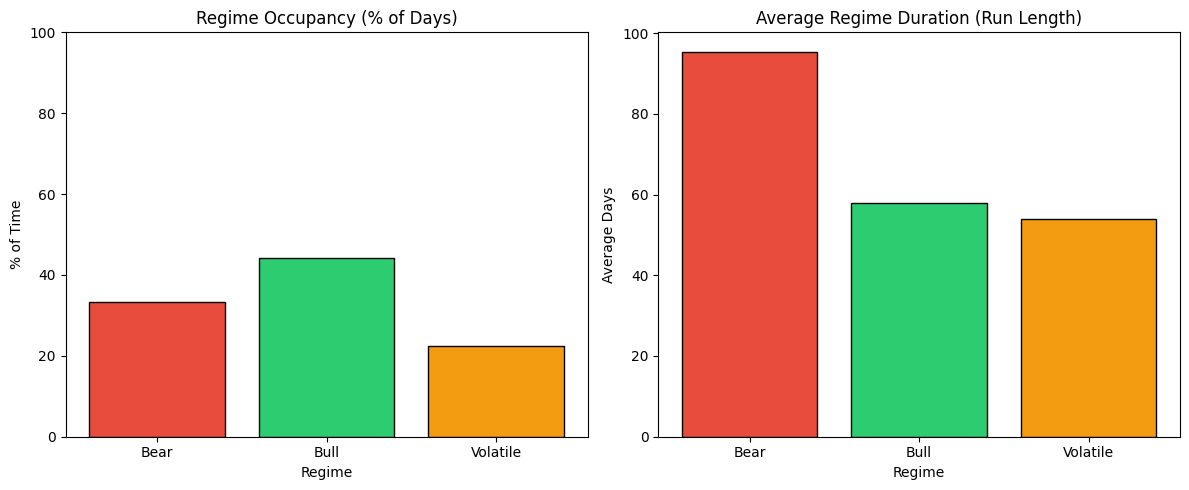

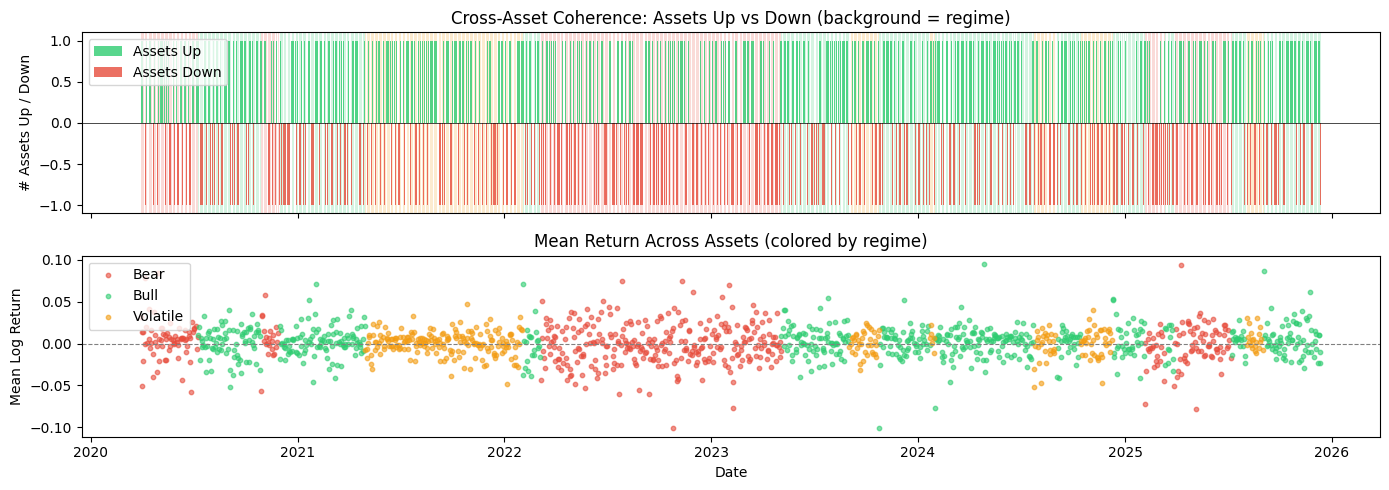

Generating Plots for Volume 80...

Generating regime visualizations...
  - Regime timeline with confidence
  - Price charts with regime shading
  - Return/vol distributions by regime (per asset)
  - Aggregate return/vol distributions by regime
  - Transition matrix heatmap
  - State occupancy & duration
  - Cross-asset coherence plot


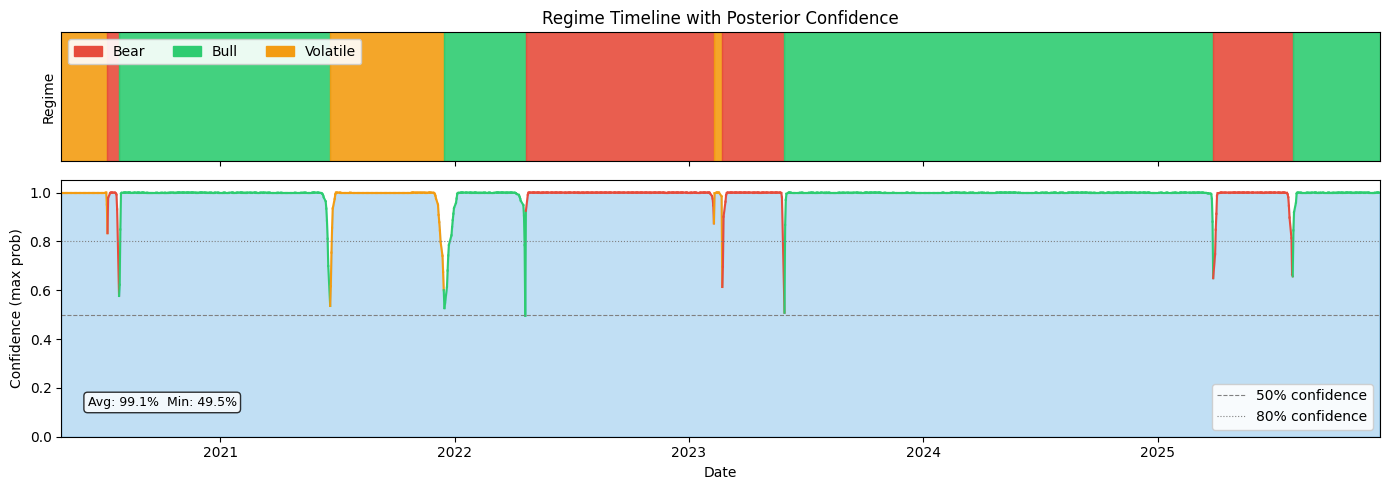

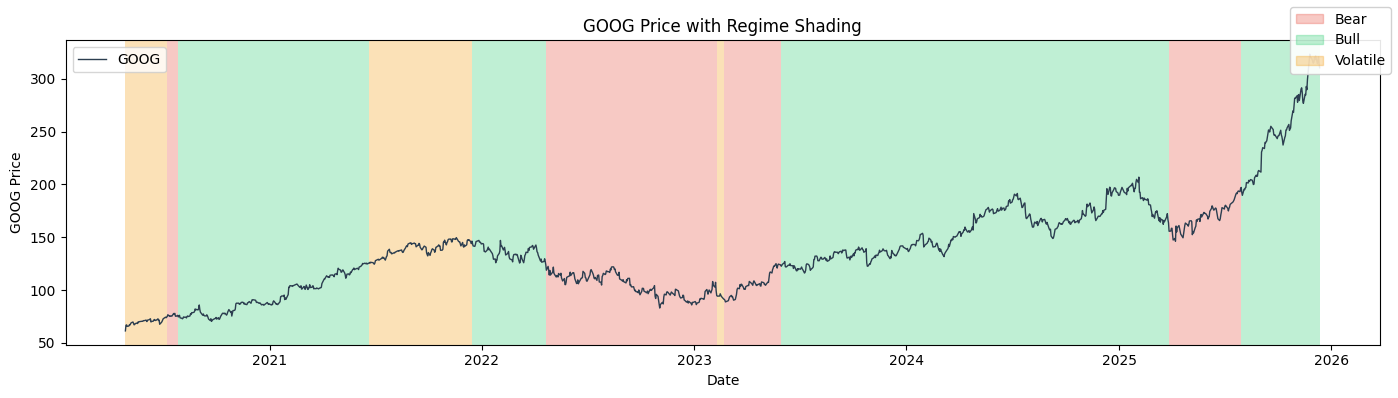

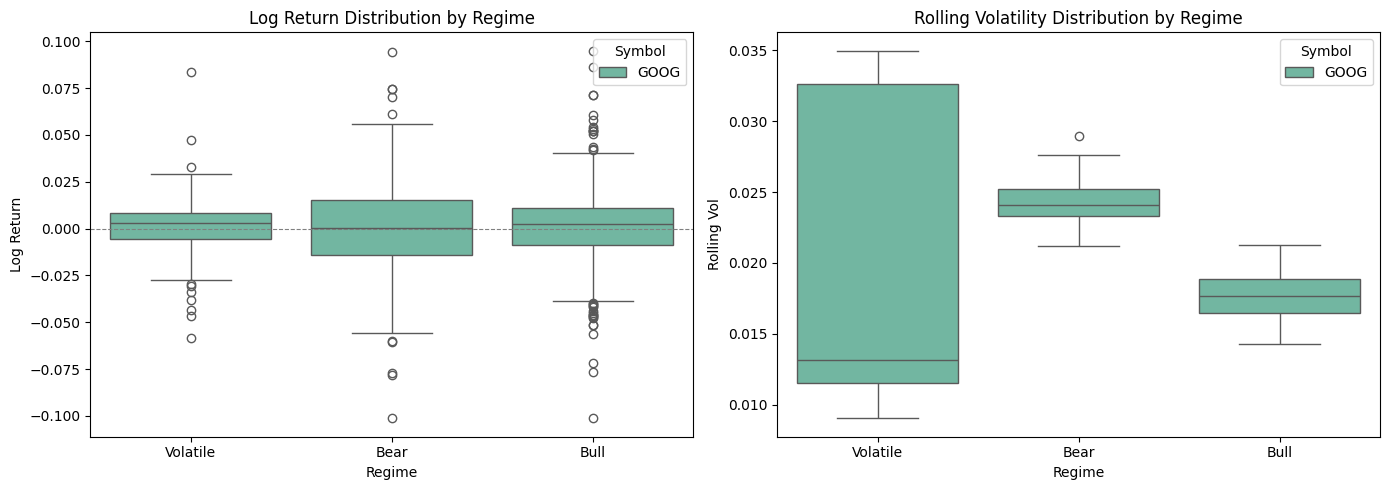

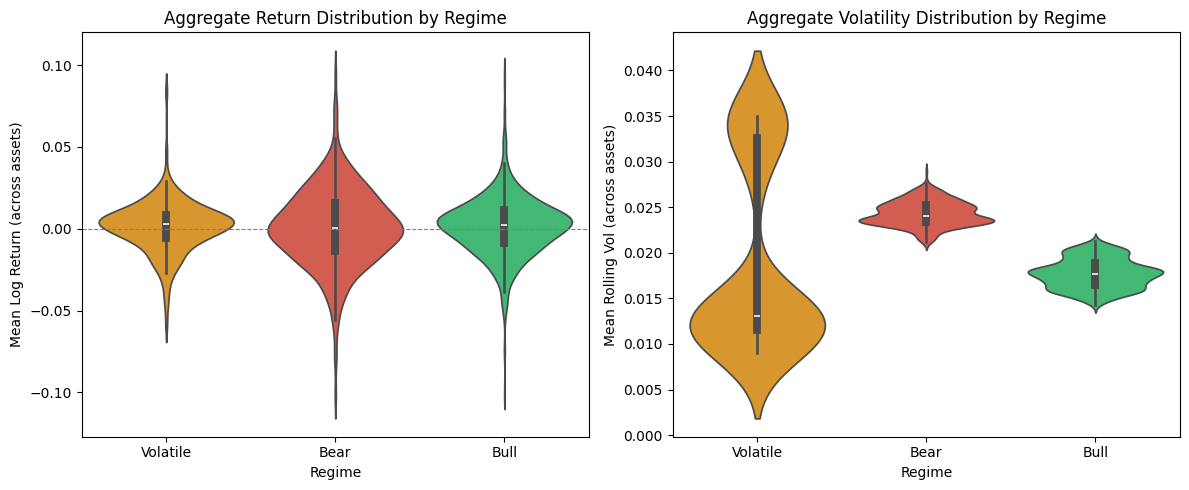

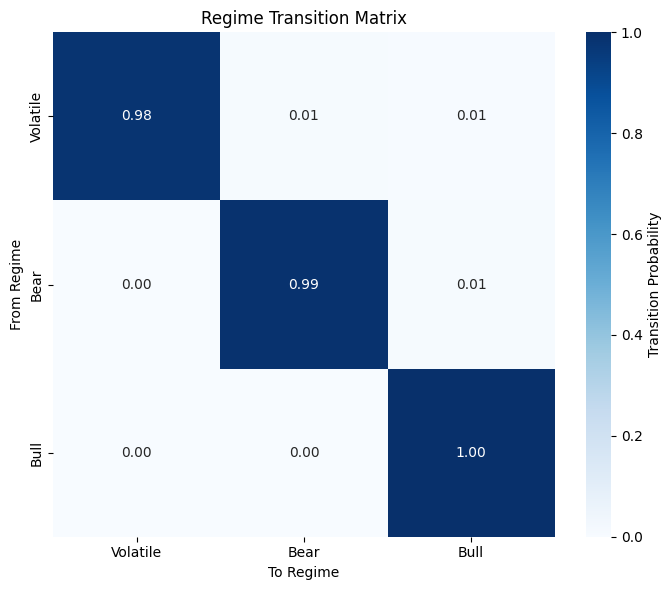

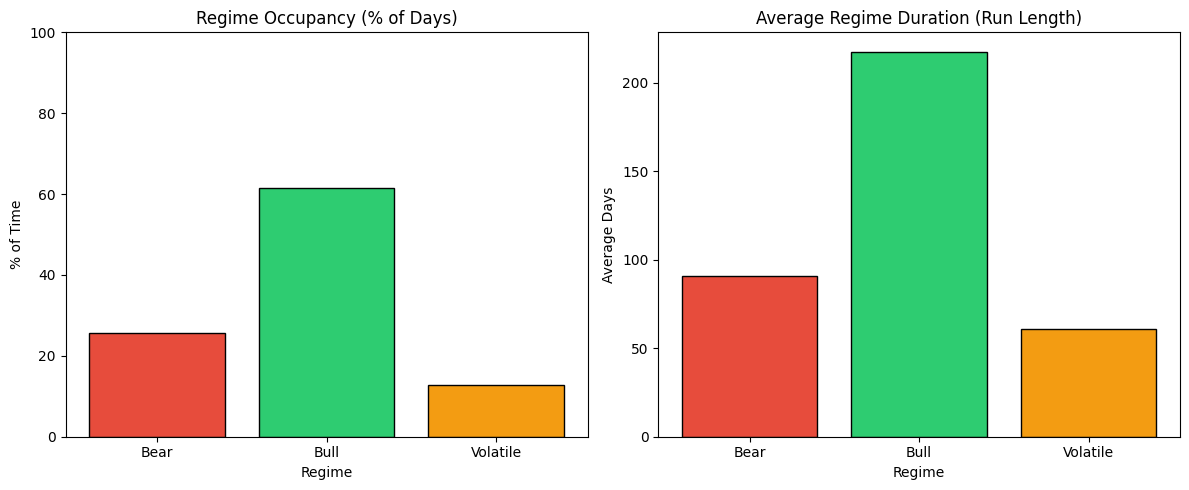

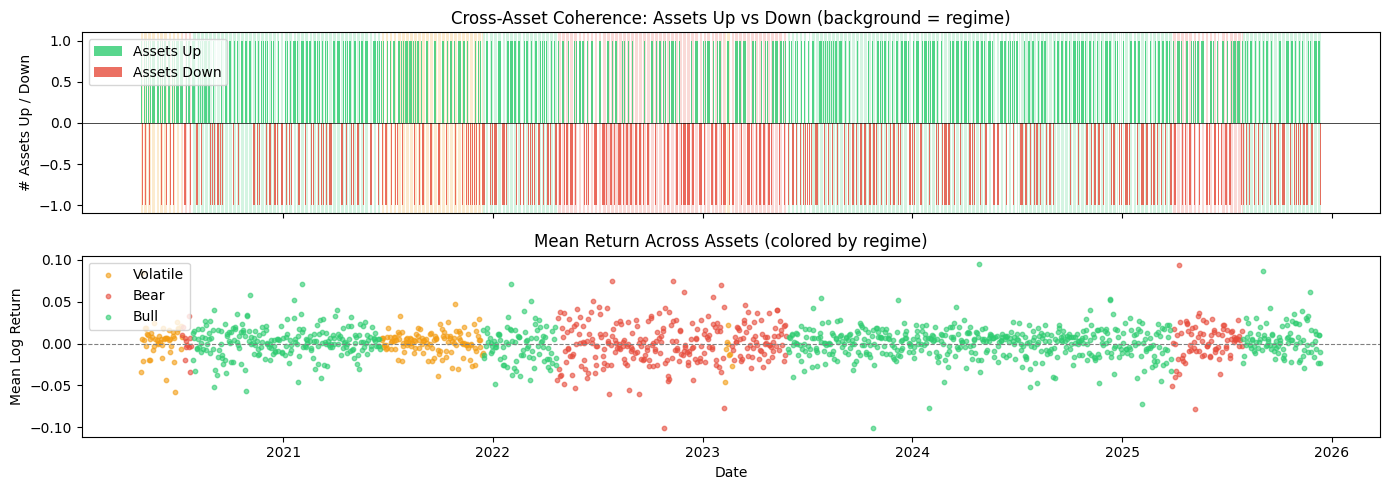

Generating Plots for Volume 100...

Generating regime visualizations...
  - Regime timeline with confidence
  - Price charts with regime shading
  - Return/vol distributions by regime (per asset)
  - Aggregate return/vol distributions by regime
  - Transition matrix heatmap
  - State occupancy & duration
  - Cross-asset coherence plot


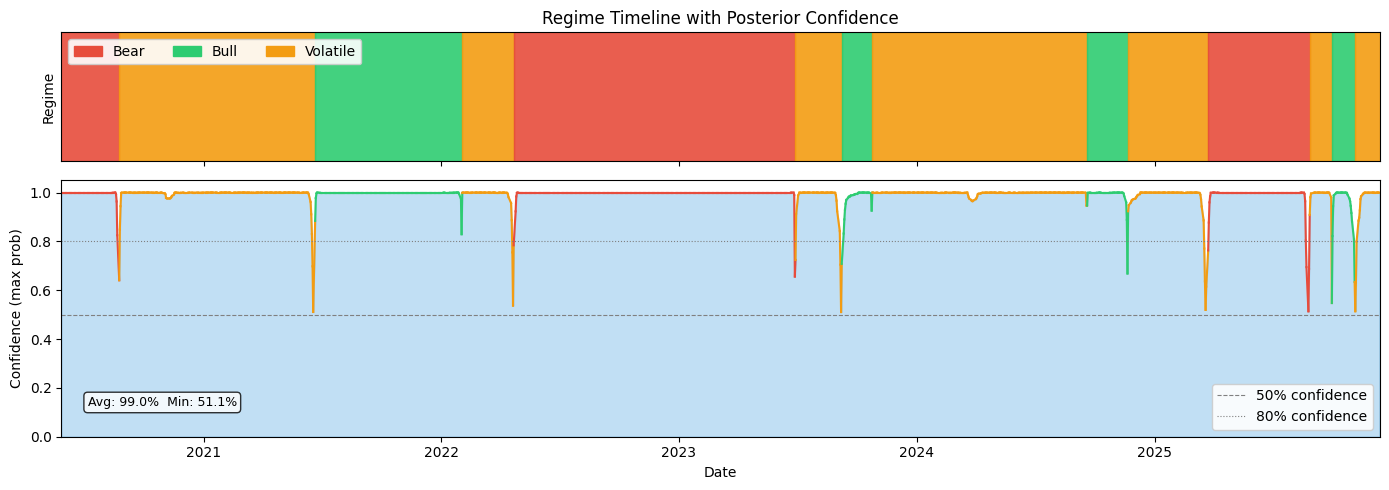

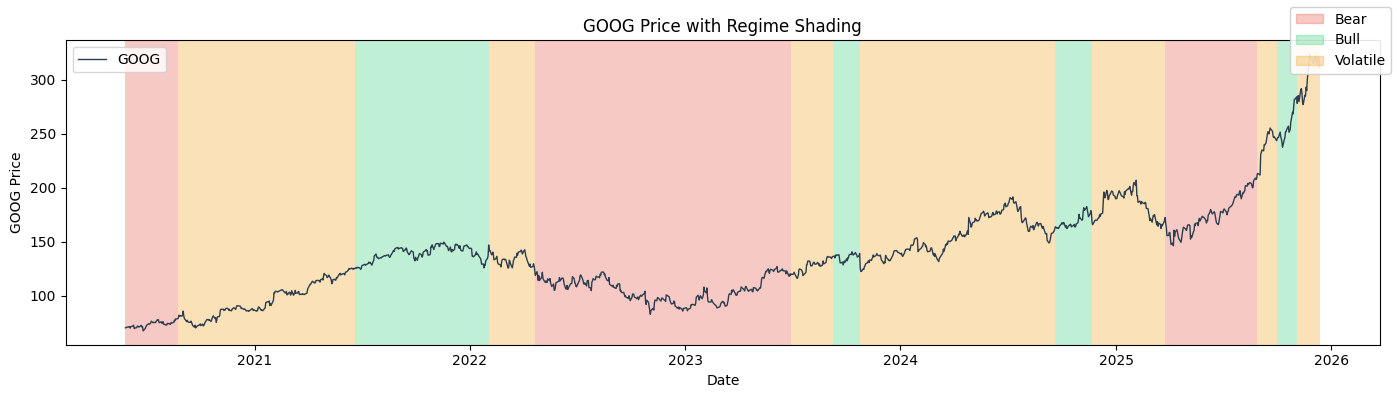

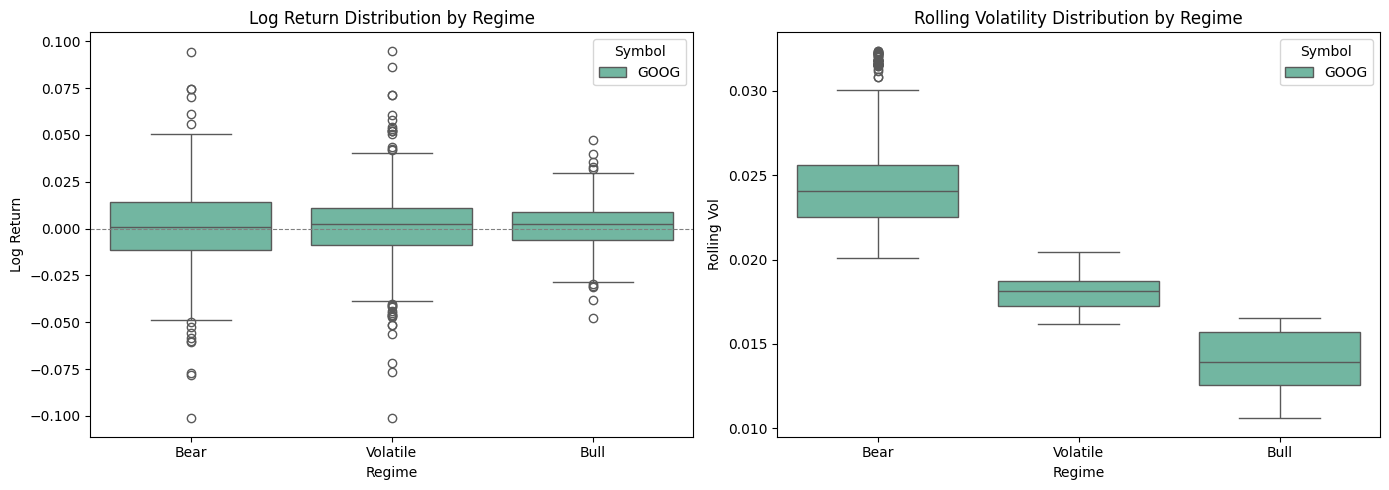

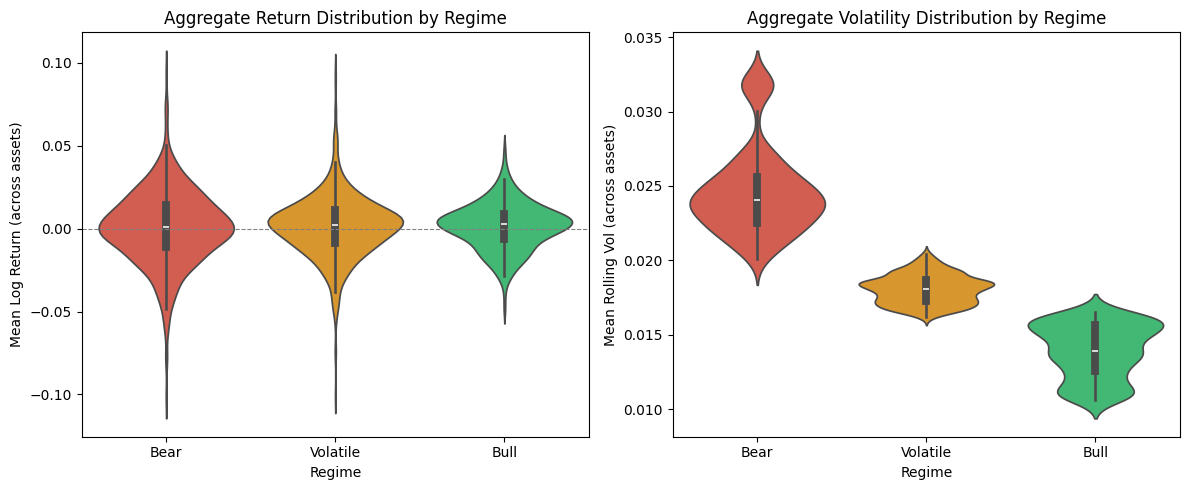

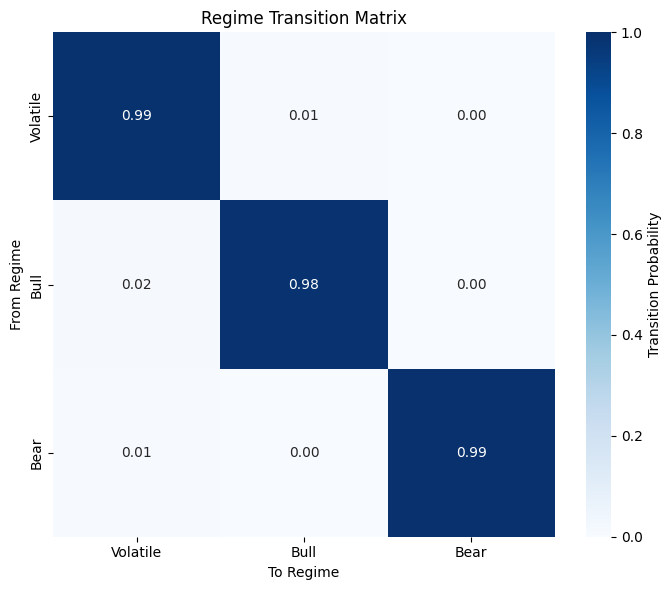

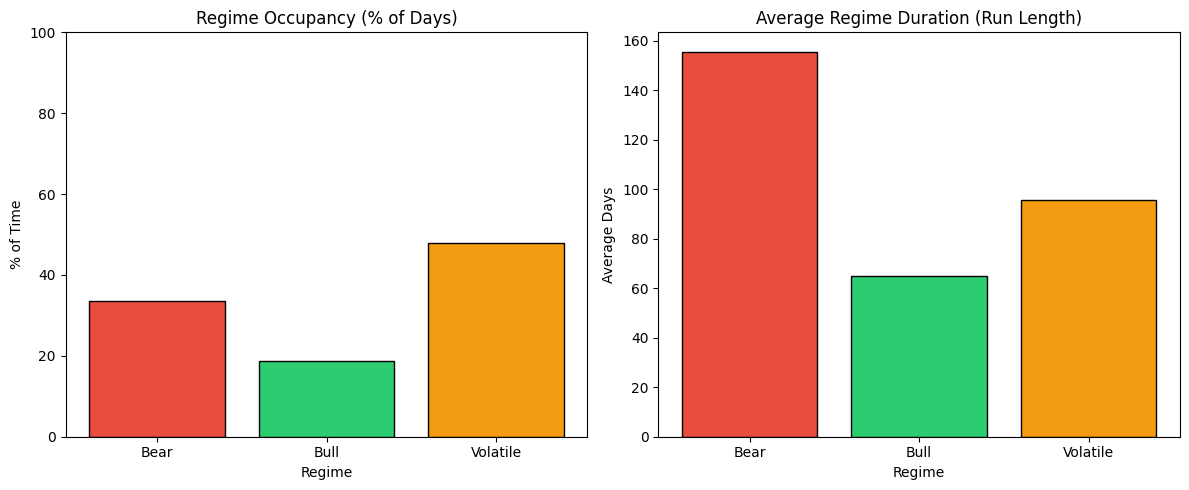

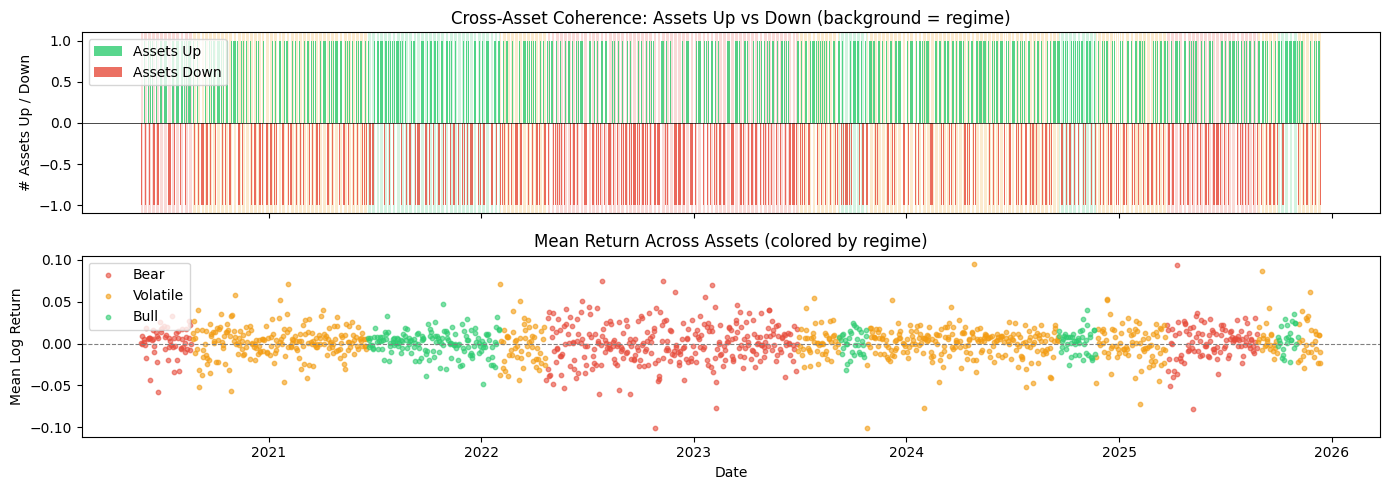

In [9]:
for w in VOL_WINDOWS:
    print(f"Generating Plots for Volume {w}...\n")
    generate_all_plots(results[w])